# Part_II_Communcating_Loan_Data_Findings_from_Prosper
## by Israel Daniel

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
#Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
from pywaffle import Waffle
import matplotlib.pyplot as plt
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Read data from csv file
df = pd.read_csv('prosperLoanData.csv')
#Print first five columns
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#Data dimensions
df.shape

(113937, 81)

In [4]:
#General summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

**Select columns that will be used for this project**

In [5]:
#Selecting columns that are of interest.
variables = ['ListingKey', 'BorrowerRate', 'LoanStatus', 'EmploymentStatus', 
             'Term', 'Occupation', 'IncomeRange', 'StatedMonthlyIncome', 'ProsperRating (Alpha)', 
            'ProsperScore', 'IncomeVerifiable', 'ListingCreationDate', 'BorrowerAPR', 'BorrowerState', 'LoanOriginalAmount', 'MonthlyLoanPayment']

loan_data = df[variables]

In [6]:
#Prints first five columns
loan_data.head()

,ListingKey,BorrowerRate,LoanStatus,EmploymentStatus,Term,Occupation,IncomeRange,StatedMonthlyIncome,ProsperRating (Alpha),ProsperScore,IncomeVerifiable,ListingCreationDate,BorrowerAPR,BorrowerState,LoanOriginalAmount,MonthlyLoanPayment
0,1021339766868145413AB3B,0.1580,Completed,Self-employed,36,Other,"$25,000-49,999",3083.333333,NaN,NaN,True,2007-08-26 19:09:29.263000000,0.16516,CO,9425,330.43
1,10273602499503308B223C1,0.0920,Current,Employed,36,Professional,"$50,000-74,999",6125.000000,A,7.0,True,2014-02-27 08:28:07.900000000,0.12016,CO,10000,318.93
2,0EE9337825851032864889A,0.2750,Completed,Not available,36,Other,Not displayed,2083.333333,NaN,NaN,True,2007-01-05 15:00:47.090000000,0.28269,GA,3001,123.32
3,0EF5356002482715299901A,0.0974,Current,Employed,36,Skilled Labor,"$25,000-49,999",2875.000000,A,9.0,True,2012-10-22 11:02:35.010000000,0.12528,GA,10000,321.45
4,0F023589499656230C5E3E2,0.2085,Current,Employed,36,Executive,"$100,000+",9583.333333,D,4.0,True,2013-09-14 18:38:39.097000000,0.24614,MN,15000,563.97


In [7]:
#Show a general overview of the selected data columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ListingKey             113937 non-null  object 
 1   BorrowerRate           113937 non-null  float64
 2   LoanStatus             113937 non-null  object 
 3   EmploymentStatus       111682 non-null  object 
 4   Term                   113937 non-null  int64  
 5   Occupation             110349 non-null  object 
 6   IncomeRange            113937 non-null  object 
 7   StatedMonthlyIncome    113937 non-null  float64
 8   ProsperRating (Alpha)  84853 non-null   object 
 9   ProsperScore           84853 non-null   float64
 10  IncomeVerifiable       113937 non-null  bool   
 11  ListingCreationDate    113937 non-null  object 
 12  BorrowerAPR            113912 non-null  float64
 13  BorrowerState          108422 non-null  object 
 14  LoanOriginalAmount     113937 non-nu

The datatype of some columns like the "ListingCreationDate" are incorrect, so I will go ahead to convert them to the proper datatype

In [8]:
#Converting the datatype of ListingCreationDate column to datetime
loan_data['ListingCreationDate'] = pd.to_datetime(loan_data.ListingCreationDate)

C:\Users\eddyu\AppData\Local\Temp\ipykernel_13880\2995779683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['ListingCreationDate'] = pd.to_datetime(loan_data.ListingCreationDate)


I will move on with checking for duplicates and missing values which will be dropped to aid proper analysis.

In [9]:
#Check for duplicates
loan_data.duplicated().sum()

0

There is no duplicates in the dataset.

In [10]:
#Check for the sum of all missing values in the dataset.
loan_data.isna().sum()

ListingKey                   0
BorrowerRate                 0
LoanStatus                   0
EmploymentStatus          2255
Term                         0
Occupation                3588
IncomeRange                  0
StatedMonthlyIncome          0
ProsperRating (Alpha)    29084
ProsperScore             29084
IncomeVerifiable             0
ListingCreationDate          0
BorrowerAPR                 25
BorrowerState             5515
LoanOriginalAmount           0
MonthlyLoanPayment           0
dtype: int64

In [11]:
#Drop rows with missing values
loan_data = loan_data.dropna()

In [12]:
#Confirm changes
loan_data.isna().sum()

ListingKey               0
BorrowerRate             0
LoanStatus               0
EmploymentStatus         0
Term                     0
Occupation               0
IncomeRange              0
StatedMonthlyIncome      0
ProsperRating (Alpha)    0
ProsperScore             0
IncomeVerifiable         0
ListingCreationDate      0
BorrowerAPR              0
BorrowerState            0
LoanOriginalAmount       0
MonthlyLoanPayment       0
dtype: int64

In [13]:
#Confirm general info about data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ListingKey             83520 non-null  object        
 1   BorrowerRate           83520 non-null  float64       
 2   LoanStatus             83520 non-null  object        
 3   EmploymentStatus       83520 non-null  object        
 4   Term                   83520 non-null  int64         
 5   Occupation             83520 non-null  object        
 6   IncomeRange            83520 non-null  object        
 7   StatedMonthlyIncome    83520 non-null  float64       
 8   ProsperRating (Alpha)  83520 non-null  object        
 9   ProsperScore           83520 non-null  float64       
 10  IncomeVerifiable       83520 non-null  bool          
 11  ListingCreationDate    83520 non-null  datetime64[ns]
 12  BorrowerAPR            83520 non-null  float64       
 13  

In [14]:
#Shape of dataset
loan_data.shape

(83520, 16)

### What is the structure of your dataset?

> There are 83520 rows and 14 columns in the selected and wrangled dataset. Out of this 14 columns, ListingKey is the only column with all its values being unique while the rest can be classified into two types: quantitative and qualitative. 

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest are the Prosper(Risk) Score, BorrowerAPR, Interest Rate, .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The original loan amount, Employment Status, monthly loan payment among others are what I hope to deliver the information I need.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables.

In [15]:
#Create variable names to avoid code repetition
base_color = sns.color_palette()[0]

**Question 1**: To discover which Employment Status had the most count.

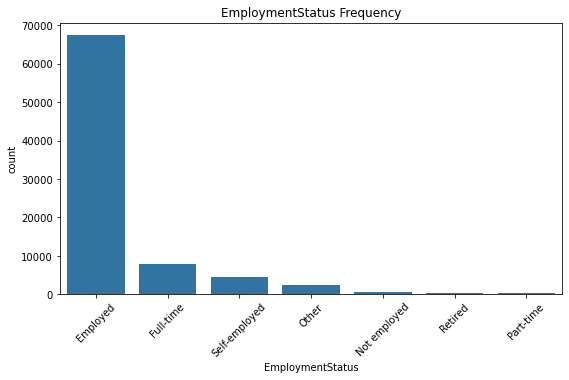

In [16]:
#Set the plot figure size
plt.figure(figsize=[9, 5])
#Arrange the values according to their frequencies in a descending order.
freq = loan_data['EmploymentStatus'].value_counts()

m_order = freq.index
plt.xticks(rotation=45)
plt.title('EmploymentStatus Frequency')
#Plotting the chart
sns.countplot(data = loan_data, x ='EmploymentStatus', color = base_color, order = m_order);

> Observation: The employed had the most count of 67310 with full time employees following next 7926 counts.

**Question 2**: Which of the Income Range levels has the most frequencies?

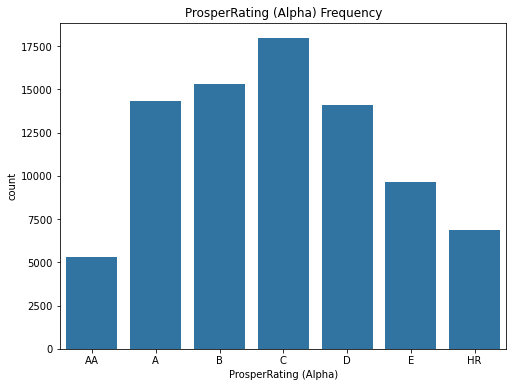

In [17]:
#Setting the plot size
plt.figure(figsize=[8, 6])

names = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

#Setting the title
plt.title('ProsperRating (Alpha) Frequency');
PA_order = loan_data['ProsperRating (Alpha)'].value_counts().index
#plotting the chart
sns.countplot(data=loan_data, x='ProsperRating (Alpha)', color=base_color, order=names);

> Observation: Borrowers that fall within the range C are the most frequent while class AA end up being the least frequent.

**Question 3**: Which of the loan terms are more frequent and by how much?

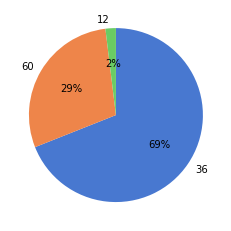

In [18]:
#Arranging the values in a ordered range
sorted_counts = loan_data['Term'].value_counts()
# We have the used option `Square`.
plt.axis('square')

palette_color = sns.color_palette('muted')

#Plotting the chart
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, colors = palette_color, 
        counterclock = False, autopct='%1.0f%%');

> Observation: Loan terms of 3 years are the most frequent with a value of 69%, while 5 years come second being 29% of the total loan terms. The least among all is 1 years which is just 2% in proportion.

**Question 4**: Looking at the Income Range.

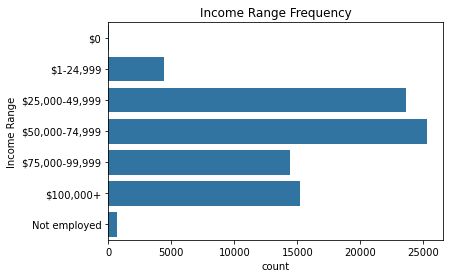

In [19]:
# Plot the Prosper Rating 
i_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed']
sns.countplot(data=loan_data, y='IncomeRange', color=base_color, order=i_order);
plt.ylabel('Income Range');
plt.title('Income Range Frequency');



> Observation: From the chart above, it seems more richer people tend to apply for loans than poorer people. I guess this could be because of their high credit score that allows them lesser interest rates.

**Question 5**: Let's look at the distribution of Prosper Score.

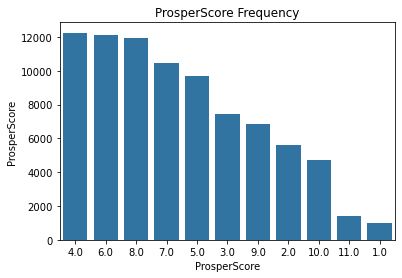

In [20]:
# Plot the ProsperScore Rating 
PS_order = loan_data['ProsperScore'].value_counts().index
sns.countplot(data=loan_data, x='ProsperScore', color=base_color, order=PS_order);
plt.ylabel('ProsperScore');
plt.title('ProsperScore Frequency');

> Observation: Risk score of 4.0 has the highest frequency, followed by 6.0, 7.0 and 8.0. These ones are probably the average scores. Extreme risk scores are the least frequent which is expected.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Average risk scores tend to be more frequent as expected with extreme scores being rare. 30.3% of the total borrowers fall with income range of $50,000-74,999. Also, 69% of borrowers had terms of 36 months with 60 months following next at 29%.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was no unusual distribution so no transformation was done on the dataset.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the
data.

**Let's first of all take a look at the pairwise correlations between quantitative features**

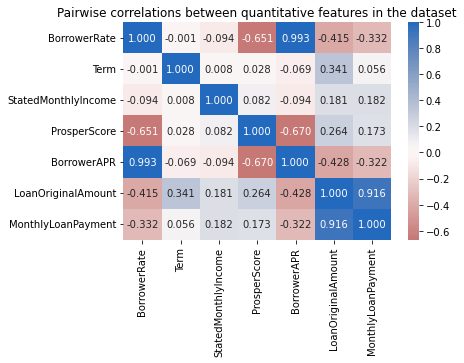

In [21]:
numeric_vars =['BorrowerRate', 'Term', 'StatedMonthlyIncome', 'ProsperScore', 'BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment']


sns.heatmap(loan_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Pairwise correlations between quantitative features in the dataset')
plt.xticks(rotation=90);

**Question 6**: How does the linear regression between interest rates and loan amounts look like?

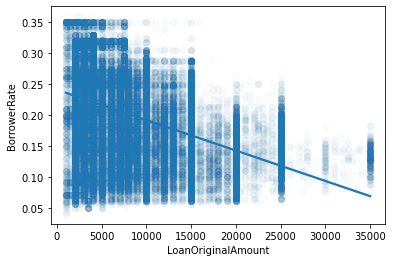

In [22]:
#plot the chart
sns.regplot(data = loan_data, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':1/50});

> Observation: The plot above shows a decreasing linear regression of loans interest rates as the original amount increases.

**Question 7**: Relationship between Loan Status and BorrowerAPR

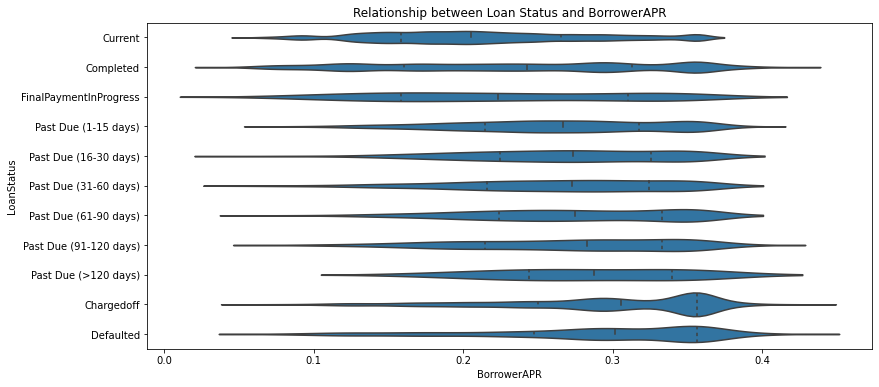

In [23]:
#Set the figure size
plt.figure(figsize=[13, 6])

status_name = ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
              'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)',
              'Chargedoff', 'Defaulted']

#Set plot title    
plt.title('Relationship between Loan Status and BorrowerAPR');
#Plot a violin plot
sns.violinplot(data=loan_data, y = 'LoanStatus', x = 'BorrowerAPR', order = status_name,
            color=base_color, inner='quartile');

> Observation: From the above visualization, current loans seem to peak around the rate of 0.2. Loans past due from 1-15 days to 91-120 days tend to have outliers from the rate of 0.03 - 0.15, with loans within 'FinalPaymentInProgress heving the lowest. Loans within the FinalPaymentInProgress column features with the longest range with few points spread across 0.01-0.42 rates. Loans within the Past Due(>120 days) have few outliers with most of its values falling between 0.2 and 0.36. 

**Question 8:** Relationship between the Income Range and the Loan's Risk Score?

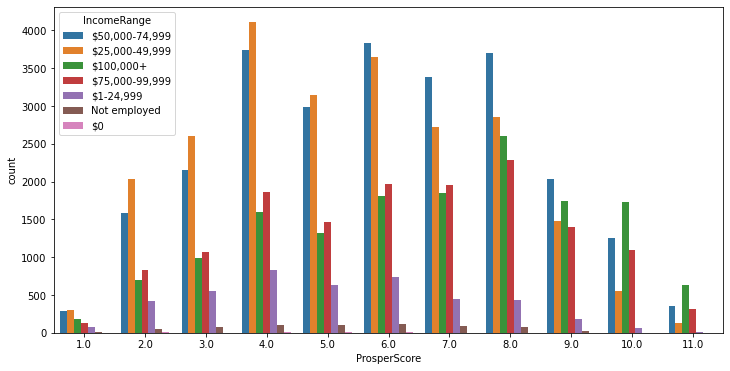

In [24]:
#Set the figure size
plt.figure(figsize=[12, 6])
#Plot the chart using seaborn's countplot
sns.countplot(data = loan_data, x = 'ProsperScore', hue = 'IncomeRange');

> Observation: Borrower's Income Range from 49,999-74,999 tend to lead among others within risk score of 1.0 - 8.0. Borrowers with income range of $100,000+ are very few among low risk scores and seem to take the lead in the best risk scores. In summary richer borrowers have low risk scores. It can also be derived that most of these borrowers are within the average income range.

**Question 9**: Relationship between Borrower Rate and Employment Status

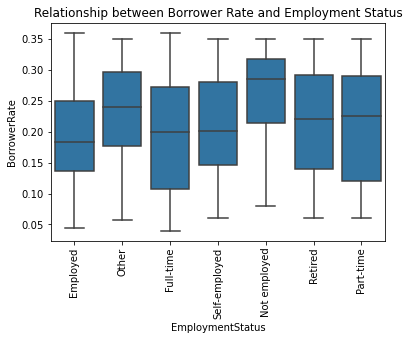

In [25]:
sns.boxplot(data = loan_data, x = 'EmploymentStatus', y = 'BorrowerRate', color = base_color)
plt.title('Relationship between Borrower Rate and Employment Status')
plt.xticks(rotation = 90);

> Observation: Full-time employed Borrowers have the longest range with most of them falling within 0.1 and 0.3. Most of the unemployed borrowers tend to have higher rates with an average close to 0.3.

**Question 10**: Relationship between ProsperScore and Term with ProsperRating Alpha of Loans.

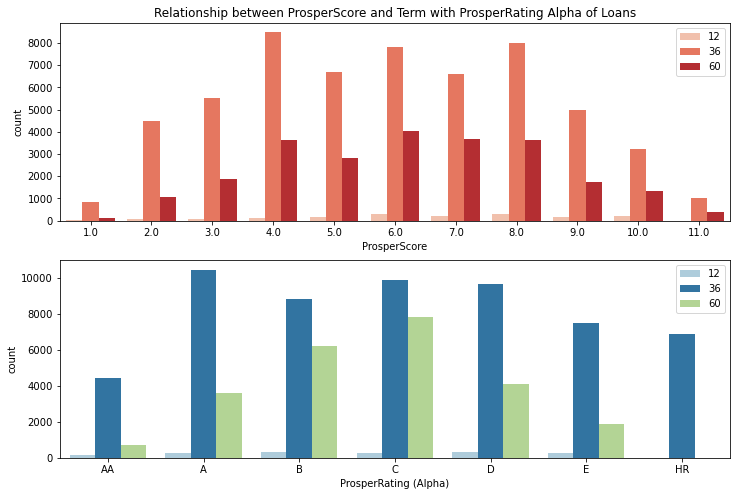

In [26]:
#Set plot figure
plt.figure(figsize=[12, 8])

#plot first subplot
plt.subplot(2,1,1)
sns.countplot(data=loan_data, x='ProsperScore', hue='Term', palette='Reds');
plt.title('Relationship between ProsperScore and Term with ProsperRating Alpha of Loans')
plt.legend(loc=1);

#plot second plot
plt.subplot(2,1,2)
names = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sns.countplot(data=loan_data, x='ProsperRating (Alpha)', hue='Term', order = names , palette='Paired');
plt.legend(loc=1);

> Observation: For the prosper score and prosper rating, loan terms of 36 months are the most frequent with 60 months following next.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Terms of 36 months are the most frequent, leading each prosper score or rating across all levels. Also, richer borrowers had the best risk scores. Average earners from $25,000-74,999 were most frequent among average risk scores.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I did not identify any interesting relationships.

## Multivariate Exploration

> I will create plots of three or more variables to investigate the data even
further.

**Question 11**: **What affects the borrower's interest?**
The loan terms and employment status tend to affect the borrower's interest.

In [27]:
#Define a function create a pointplot using inputed variables
def point(x, y, h, label1, label2, label3, label4):
    #Sets the figure size
    plt.figure(figsize=[8,6])
    # Create a pointplot chart
    sns.pointplot(data=loan_data, x=x, y=y, hue=h,
                   palette='tab10');
    plt.legend(loc=3, title=label4);
    plt.title(label1);
    plt.xlabel(label2);
    plt.ylabel(label3);
    plt.xticks(rotation = 45);

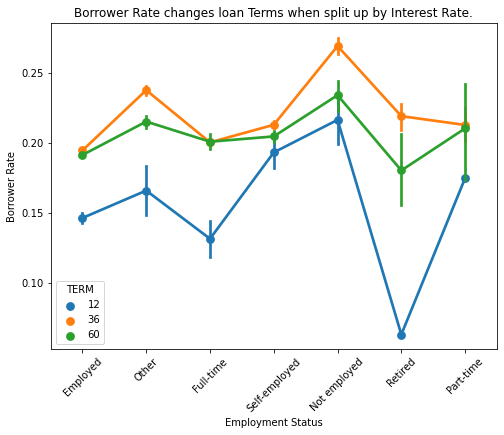

In [28]:
#Plot a pointplot with the point function
point('EmploymentStatus', 'BorrowerRate', 'Term', 
     'Borrower Rate changes loan Terms when split up by Interest Rate.',
     'Employment Status', 'Borrower Rate', 'TERM')

> Observation: From the visualization above, retired borrowers tend to have the lowest interest rates while the not-employed borrowers exhibit the highest interest rates. The terms also have an interesting effect as shorter terms have lower rates with 12 months being the lowest. Loans with 36 months follows next with a few exception for full-time and part-time borrowers at which they share similar rates. The employed borrowers exhibit a small variance.

**Question 12**: **What's the relationship between the interest rate and the prosper rating?**

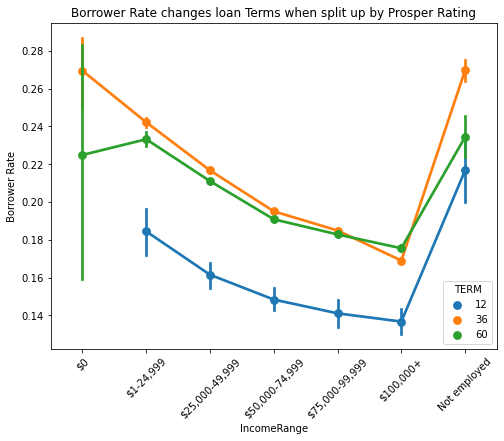

In [29]:
# Create a pointplot to show how the BorrowerRate changes for different loan Terms
# when split up by ProsperRating
plt.figure(figsize=[8,6])

i_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed']
sns.pointplot(data=loan_data, x='IncomeRange', y='BorrowerRate', hue='Term', order = i_order,
                   palette='tab10');
plt.legend(loc=4, title='TERM');
plt.title('Borrower Rate changes loan Terms when split up by Prosper Rating');
plt.ylabel(' Borrower Rate ');
plt.xticks(rotation = 45);

> Observation: Loans for 12 months tend to have shorter rates compared to others. There is a decrease of interest rate as income range increases. The unemployed have the highest rates across the three terms.

**Question 13**: What affects the borrower’s APR?
Terms and Employment Status will be compared with the Borrower's APR.

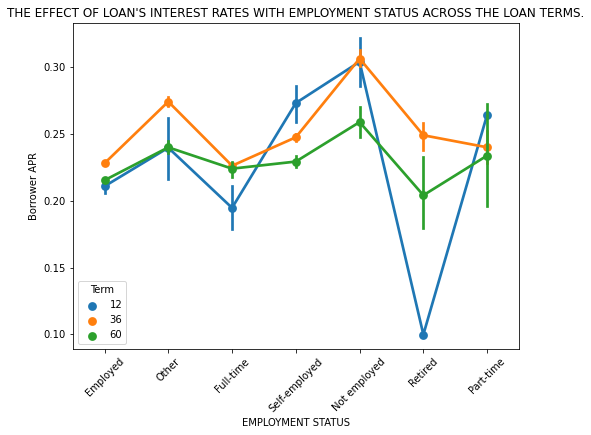

In [30]:
#Plot a pointplot with the point function
point('EmploymentStatus', 'BorrowerAPR', 'Term',
     'THE EFFECT OF LOAN\'S INTEREST RATES WITH EMPLOYMENT STATUS ACROSS THE LOAN TERMS.',
     'EMPLOYMENT STATUS', 'Borrower APR', 'Term')

> From the visualization above, those among the not-employed tend to have the highest interest rates, while those among the retired tend to have the smallest rates among the three terms (with the exception of the 36 months term, where full-time carries the shortest rates). The interest rates for retired borrowers exhibits the highest variance among the term, while employed borrowers exhibits the lowest variance.

**Question 14**: Relationship between Original Loan Amount, Monthly Loan Payment and Borrower Rate.

In [31]:
#Define a function create a scatterplot using inputed variables
def scatter(x, y, c, label1, label2, label3, label4):
    #Set figure size
    plt.figure(figsize=[15, 6])
    #Plotting the chart
    plt.scatter(data=loan_data, x=x, y=y, c = c);
    #Setting the x and y labels
    plt.xlabel(label2);
    plt.ylabel(label3);
    #Setting the title
    plt.title(label1);
    #Add the color bar
    plt.colorbar(label=label4);

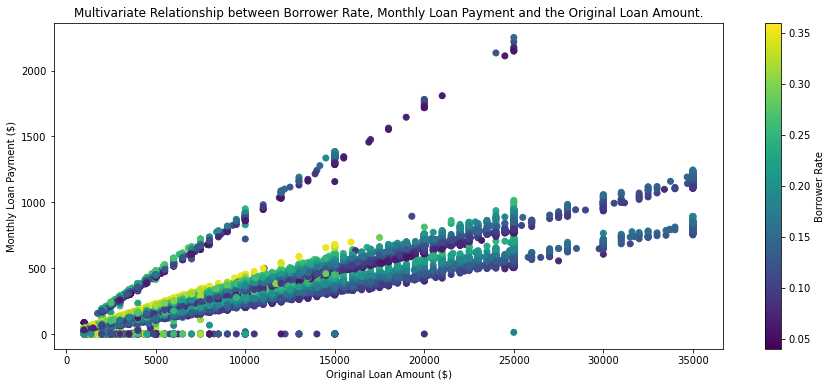

In [32]:
#Plot the chart with the scatter function
scatter('LoanOriginalAmount', 'MonthlyLoanPayment', 'BorrowerRate', 
        'Multivariate Relationship between Borrower Rate, Monthly Loan Payment and the Original Loan Amount.', 
        'Original Loan Amount ($)', 'Monthly Loan Payment ($)', 'Borrower Rate')

> Observation: Most of the loans exhibits low interest rates. Although, some of the original loan amounts below 15,000 tend to have very high rates which I think is as a result or high risk scores.

**Question 15**: Multivariate Relationship between Prosper Score, Monthly Loan Payment and the Original Loan Amount?

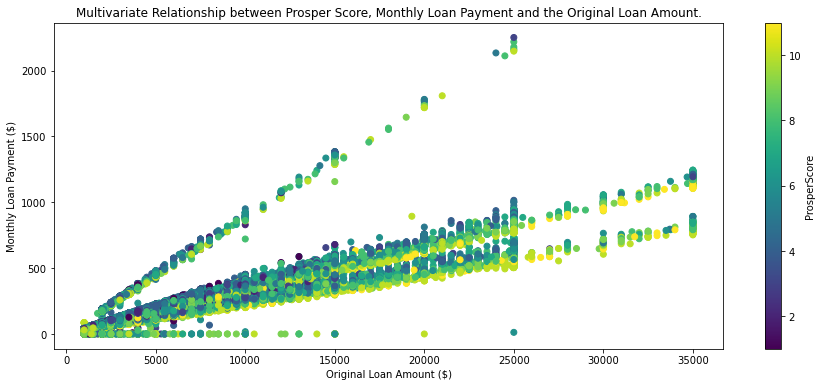

In [33]:
#Plot the chart with the scatter function
scatter('LoanOriginalAmount', 'MonthlyLoanPayment', 'ProsperScore',
       'Multivariate Relationship between Prosper Score, Monthly Loan Payment and the Original Loan Amount.',
       'Original Loan Amount ($)', 'Monthly Loan Payment ($)', 'ProsperScore')

> From the chart above, there seem to be a steady rise between monthly loan payment and original loan amount, though not distinct as they are some values not following the common trend. The risk score does not possess a common trend but there seem to be most of the lower scores among the lower values with most of the higher score among the higher values.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Borrower rates and borrower apr seem to strengthen each other. Richer borrowers had lower risk rates. Very short terms of 12 months had lower interest rates compared to others. Also, average earners tend to borrow more

### Were there any interesting or surprising interactions between features?

> The terms had a surprising effect on the borrower rates and apr has very short terms had lower rates

## Conclusions
>Exploratory steps were taken to identify relationships between variables of interest like income range, employment status, loan terms, loan status, borrower rates, monthly loan payments and monthly loan amounts among others.

>It was discovered that most richer borrowers had the best risk scores as expected. Also, terms of 12 months which was the shortest had lower interest rates on them compared to other terms. Terms of 36 months were the most frequent with a percentage of 69%.

>Most of the loans exhibits low interest rates. Although, some of the original loan amounts below 15,000 tend to have very high rates which I think is as a result or high risk scores. 

>Retired borrowers had low interest rates, employed borrowers had and average rate while unemployed borrowers had the highest rates.